In [1]:
dataset = "P-SET"
llm_type = "llama3.1:70b"


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrices_for_column_pairs(df, gt_col,vis_columns):

    n_pairs = len(vis_columns)

    # Determine layout: square-ish grid
    n_cols = int(np.ceil(np.sqrt(n_pairs)))
    n_rows = int(np.ceil(n_pairs / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = axes.flatten()
    col1 = gt_col
    for idx, col2 in enumerate(vis_columns):
        ax = axes[idx]
        
        # Drop rows with missing values in either column
        sub_df = df[[col1, col2]].dropna().copy()
        start_length = len(sub_df)
        # sub_df = sub_df[sub_df.apply(lambda x: True if ("_" not in x[col1] and '_' not in x[col2]) else False, axis=1)]
        filter_length = len(sub_df)
        # Get confusion matrix
        labels = sorted(set(sub_df[col1]) | set(sub_df[col2]))
        cm = confusion_matrix(sub_df[col1], sub_df[col2], labels=labels)

        # Plot heatmap
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=ax)
        ax.set_title(f"{col1} vs \n{col2}\n strt: {start_length}\nelim.:{filter_length-start_length}", fontsize=10)
        ax.set_xlabel(col2)
        ax.set_ylabel(col1)

    # Hide any extra axes
    for j in range(len(vis_columns), len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    return fig


********************Sleep************************
['../exports/05_llm_llama3.1:70b_P-SET/Sleep/Sleep_Documents_att_False.pkl', '../exports/05_llm_llama3.1:70b_P-SET/Sleep/Sleep_Sentences_att_False.pkl', '../exports/05_llm_llama3.1:70b_P-SET/Sleep/Sleep_Sentences_att_True.pkl', '../exports/05_llm_llama3.1:70b_P-SET/Sleep/Sleep_Documents_att_True.pkl']
Sleep_Sentences_att_True
Ao True Sleep_Sentences_att_True
****************Sentence**************


is_keyword_present
0.0    396
1.0    186
Name: count, dtype: int64

Sent_gt_Sleep  is_keyword_present
False          0.0                   394
True           1.0                   159
False          1.0                    27
True           0.0                     2
Name: count, dtype: int64
Event_Name_Sleep
Event_Name_LLM_Events_all_evidence_Sent_Sleep
Event_Name_LLM_Events_keyword_evidence_Sent_Sleep
Event_Name_LLM_Events_example_evidence_Sent_Sleep
Event_Name_LLM_Events_no_evidence_Sent_Sleep
file written to ../exports/06_analysis/Sleep/all_correct_Sleep_Sentences_att_True.xlsx


,col_name,technique,pos_sup,neg_sup,f1_score,precision,recall,TP,TN,FP,FN,time
0,Event_Name_Sleep,Sleep_Ao,161,421,0.712695,0.555556,0.993789,160,293,128,1,0.003037
1,Event_Name_LLM_Events_all_evidence_Sent_Sleep,LLM_KiEi_Sent_Ao,161,421,0.668058,0.503145,0.993789,160,263,158,1,4.703334
2,Event_Name_LLM_Events_keyword_evidence_Sent_Sleep,LLM__Ki_Sent_Ao,161,421,0.655804,0.487879,1.000000,161,252,169,0,4.238193
3,Event_Name_LLM_Events_example_evidence_Sent_Sleep,LLM__Ei_Sent_Ao,161,421,0.662500,0.498433,0.987578,159,261,160,2,4.715052
4,Event_Name_LLM_Events_no_evidence_Sent_Sleep,LLM__Sent_Ao,161,421,0.646465,0.479042,0.993789,160,247,174,1,4.284155


Sleep_Documents_att_True
Ao True Sleep_Documents_att_True
****************Document**************


is_keyword_present
1.0    12
0.0     6
Name: count, dtype: int64

Doc_gt_Sleep  is_keyword_present
True          1.0                   10
False         0.0                    4
              1.0                    2
True          0.0                    2
Name: count, dtype: int64
Event_Name_Sleep
Event_Name_LLM_Events_all_evidence_Doc_Sleep
Event_Name_LLM_Events_keyword_evidence_Doc_Sleep
Event_Name_LLM_Events_example_evidence_Doc_Sleep
file written to ../exports/06_analysis/Sleep/all_correct_Sleep_Documents_att_True.xlsx


,col_name,technique,pos_sup,neg_sup,f1_score,precision,recall,TP,TN,FP,FN,time
0,Event_Name_Sleep,Sleep_Ao,12,6,0.833333,0.833333,0.833333,10,4,2,2,0.003023
1,Event_Name_LLM_Events_all_evidence_Doc_Sleep,LLM_KiEi_Doc_Ao,12,6,0.814815,0.733333,0.916667,11,2,4,1,12.767266
2,Event_Name_LLM_Events_keyword_evidence_Doc_Sleep,LLM__Ki_Doc_Ao,12,6,0.814815,0.733333,0.916667,11,2,4,1,13.698991
3,Event_Name_LLM_Events_example_evidence_Doc_Sleep,LLM__Ei_Doc_Ao,12,6,0.857143,0.750000,1.000000,12,2,4,0,14.230792


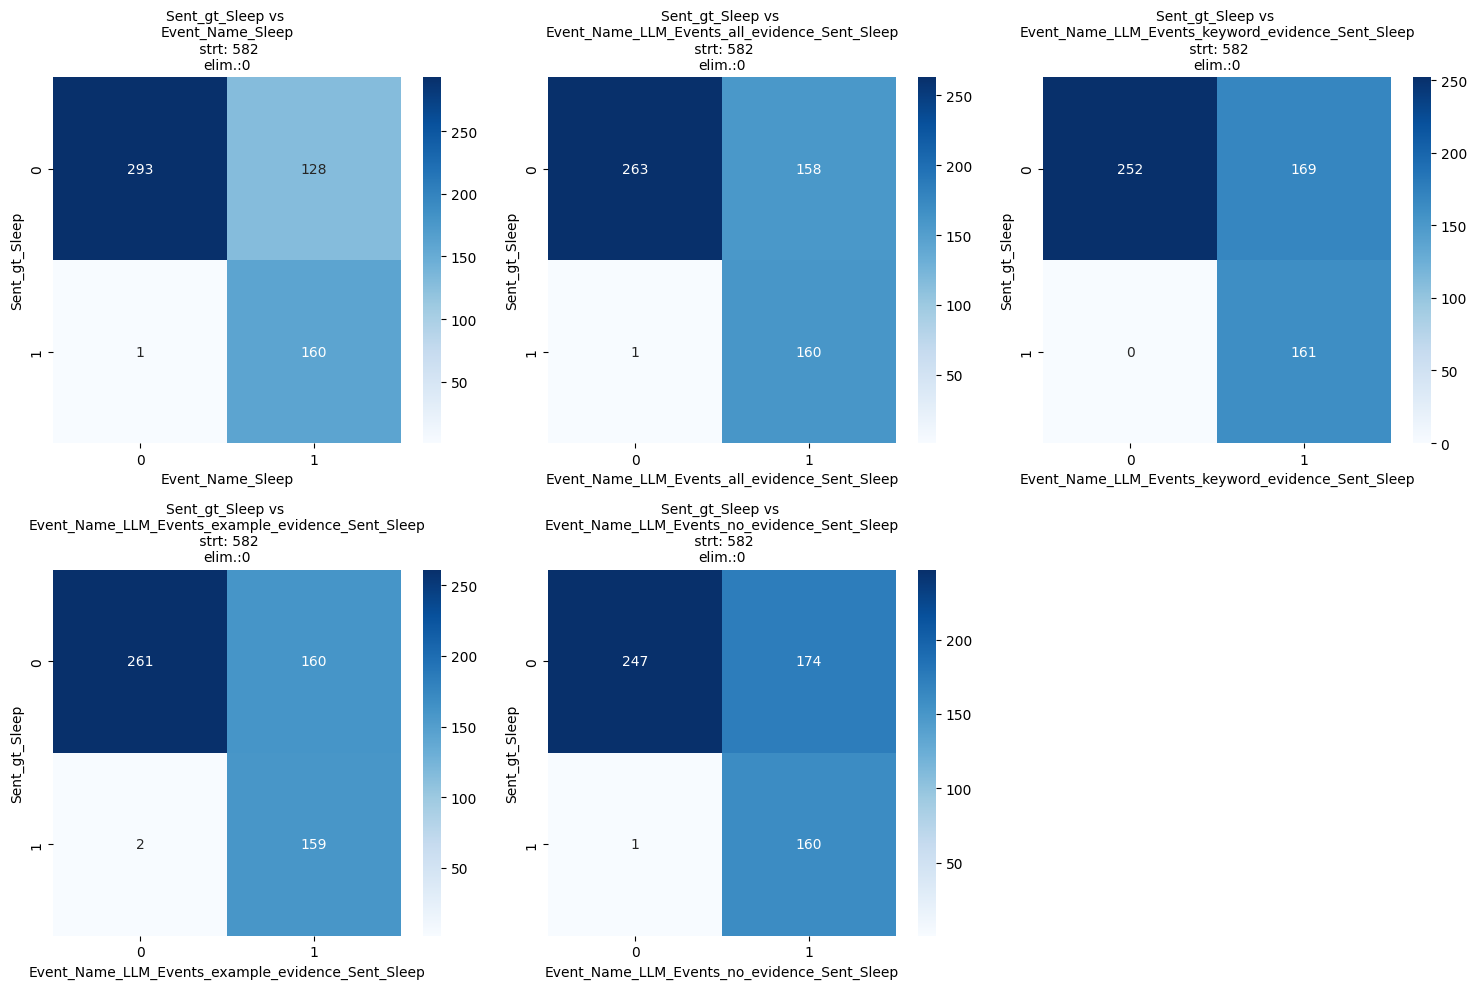

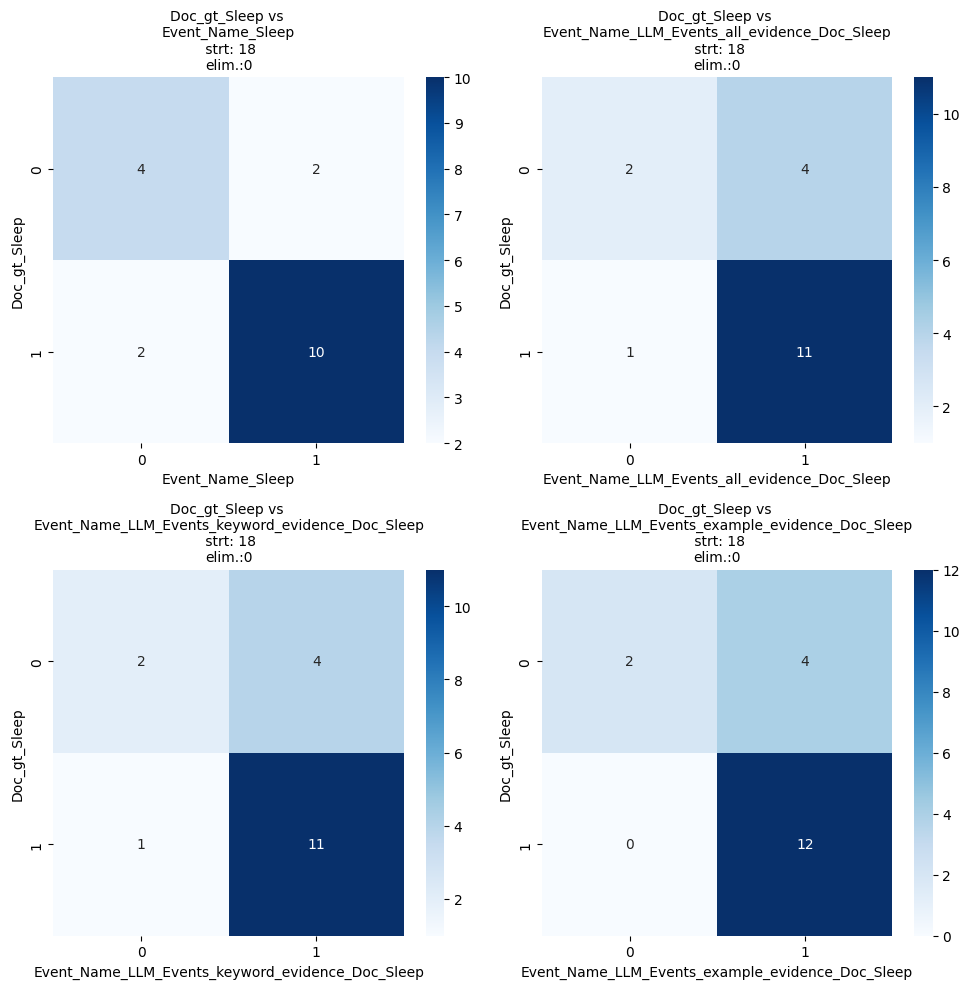

In [ ]:
from glob import glob
import os
import pandas as pd
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from itertools import product
disagreement_type = "correct"
llm_type = "llama3.1:70b"
def get_time(x):
    x = np.array(x)
    # Remove NaNs
    x = x[~np.isnan(x)]
    # If less than 3 values, just return mean
    if len(x) < 3:
        return np.mean(x)
    # Remove outliers using IQR
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    mask = (x >= q1 - 1.5 * iqr) & (x <= q3 + 1.5 * iqr)
    return np.mean(x[mask])

def fixnames(ls,suffix,remove):
    LS=[]
    for s in ls:
        s = s.replace("_keyword_evidence","_Ki").replace("_example_evidence","_Ei").replace("_no_evidence","").replace("_all_evidence","KiEi").replace("Event_Name_",'').replace("_Events",'_').replace('_'+remove,"")
        s = s + "_" + suffix
        if "sentence" in s:
            s = s.replace("sentence","")
            s = s + "_Sent-SET"
        elif "document" in s:
            s = s.replace("document","")
            s = s + "_Doc-SET"
        LS.append(s)
    return LS

def get_col_suffix(keyword_input, example_input):
    col_suffix = "no"
    if keyword_input and example_input:
        col_suffix = "all"
    elif keyword_input and not example_input:
        col_suffix = "keyword"
    elif not keyword_input and example_input:
        col_suffix = "example"
    return col_suffix

LLM_dict = {}
llm_models_all = []
for keyword_input, example_input in [i for i in product([True,False],[True,False])]: 
    for input_type in ["Sent", "Doc"]:
        col_suffix = get_col_suffix(keyword_input, example_input)
        llm_models_all.append(f"LLM_Events_{col_suffix}_evidence_{input_type}")
df_both = pd.read_pickle("../exports/04_dictionary_features.pkl")

dataset = "P-SET"
for analysis_type in ["all"]: #(M-SET, A-SET, D-SET, F-SET)
    for ET in ["Sleep"]:
        print(f"********************{ET}************************")
        llm_files = glob(f"../exports/05_llm_{llm_type}_{dataset}/{ET}/*.pkl")
        print(llm_files)
        try:
            gt_file_sent = glob(f"../exports/04_groundtruth/{dataset}/Annotated/{ET}_Sentences.pkl")[0]
            gt_file_doc = glob(f"../exports/04_groundtruth/{dataset}/Annotated/{ET}_Documents.pkl")[0]
        except IndexError:
            print(f"No ground truth file found for {ET} in ../exports/04_groundtruth/{dataset}/Annotated/")
            continue    
        
        llm_files = [i for i in llm_files if "True" in i]
        for file in llm_files:
            filename = os.path.basename(file).rstrip('.pkl')
            print(filename)
            text_type = "Document" if "Document" in filename else "Sentence"
            _,attribute_requested = filename.split("_")[-2:]
            attribute_requested = eval(attribute_requested)
            suffix = "Ao" if attribute_requested else ""           
            print(suffix,attribute_requested,filename)
            
            if text_type == "Sentence":
                gt_file = gt_file_sent
                id_type = id_type
                gt_column = f"Sent_gt_{ET}"
            elif text_type == "Document":
                gt_file = gt_file_doc
                id_type = "ROW_ID"
                gt_column = f"Doc_gt_{ET}"
            print(f"****************{text_type}**************")
            gt_df = pd.read_pickle(gt_file)
            gt_df = gt_df.dropna(subset=gt_column)
            if not attribute_requested:
                gt_df[gt_column] = gt_df.apply(lambda x: x[gt_column] if x['negation']==False else False,axis=1)
            
            gt_df['Lemma'] = gt_df['Lemma'].apply(lambda x: tuple(x))
            gt_df["is_keyword_present"] = gt_df["Event_Name"].apply(lambda x: 1 if ET in x else 0)
            id_to_gt = {row[id_type]:row[gt_column] for _,row in gt_df.iterrows()}
            id_to_negation = {row[id_type]:row['negation'] for _,row in gt_df.iterrows()}
            id_to_key_present = {row[id_type]:row[f"is_keyword_present"] for _,row in gt_df.iterrows()}
            id_to_lemma = {row[id_type]:row[f"Lemma"] for _,row in gt_df.iterrows()}
            id_to_dict_time = {row[id_type]:row[f"Time"] for _,row in df_both.iterrows()}
            output_folder = f"../exports/06_analysis/{ET}"
            os.makedirs(output_folder,exist_ok=True)
       
            
            
            df = pd.read_pickle(file)
            llm_models = [i for i in llm_models_all if i in df]
            df[f'{ET}_time'] = df[id_type].apply(lambda x:id_to_dict_time.get(x))
            df["focus_event"] = ET
            df['negation'] = df[id_type].apply(lambda x:id_to_negation.get(x))
            
            
            df[gt_column] = df[id_type].apply(lambda x:id_to_gt.get(x,None))
        
            
            df[f"is_keyword_present"] = df[id_type].apply(lambda x:id_to_key_present.get(x))
            display(df.is_keyword_present.value_counts())
            
            print(df[[gt_column,"is_keyword_present"]].value_counts())
                        
            df[f"dict_Lemma"] = df[id_type].apply(lambda x:id_to_lemma.get(x))
            df.dropna(subset=gt_column,inplace=True)
            df[gt_column] = df[gt_column].astype(int)

            for col in llm_models:
                df[f"{col}_{ET}_time"] = df[col].apply(lambda x:x['event_detection_time'])
            if len(df) > 1:
                first_row = df.iloc[0]
                splittable_columns = ["Event_Name"]+[f"Event_Name_{model}" for model in llm_models]
                disagreement_dfs = []
                generated_columns = []

                for col in splittable_columns:
                    generated_column = f"{col}_{ET}"
                    df[generated_column] = df[col].apply(lambda x: 1 if ET in x else 0)
                    
                    generated_columns.append(generated_column)
                
                f1s, accs, precs, recs, psup, nsup, times, tp, tn, fp, fn = [],[],[],[],[],[],[],[],[],[],[]
                
                
                for col in generated_columns:
                    print(col)
                    df_temp = df.copy()
                    y_gt = df_temp[gt_column]
                    LLM_dict[(attribute_requested,gt_column)] = y_gt
                    preds = df_temp[col]
                    LLM_dict[(attribute_requested,col)] = preds
                    f1s.append(f1_score(y_gt, preds))
                    accs.append(accuracy_score(y_gt, preds))
                    precs.append(precision_score(y_gt, preds, zero_division=0))
                    recs.append(recall_score(y_gt, preds))   
                    psup.append(sum(y_gt))
                    nsup.append(sum(y_gt==0))
                    times.append(get_time(df_temp[f"{col.lstrip('Event_Name_')}_time"]))
                    #true positive
                    tn_i, fp_i, fn_i, tp_i = confusion_matrix(y_gt, preds).ravel()
                    tp.append(tp_i)
                    tn.append(tn_i)
                    fp.append(fp_i)
                    fn.append(fn_i)
                
            
                results_df = {"col_name":generated_columns, "technique":fixnames(generated_columns,suffix,ET), "pos_sup": psup, "neg_sup": nsup, "f1_score":f1s, "precision":precs, "recall":recs, "TP":tp, 'TN':tn, 'FP':fp, 'FN':fn, "time":times} 
                results = pd.DataFrame(results_df)   
                plot_confusion_matrices_for_column_pairs(df, gt_column,vis_columns=generated_columns)
                op_path = f"{output_folder}/{analysis_type}_{disagreement_type}_{filename}.xlsx"


                df.to_excel(op_path,index=False)
                print(f"file written to {op_path}")
                display(results)

In [1]:
print(f"{output_folder}/{analysis_type}_{disagreement_type}_{filename}.xlsx")

NameError: name 'output_folder' is not defined

In [12]:
from pprint import pprint
pprint(df_temp[(df_temp[gt_column]==False) & (df_temp[col]==True) & (df_temp["Event_Name_Sleep"]==False)][[id_type,text_type, gt_column, col]].to_string())

('     '
 'ROW_ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [65]:
gt_df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'Document',
       'AGE', 'LOS_DAYS', 'IS_ALIVE', 'DOCUMENT_LOWER', 'NUM_NOTES',
       'MAX_NOTES_PER_DAY', 'MAX_NOTES_PER_CHARTTIME', 'all_dates_present',
       'Sentences', 'Sentences_Raw', 'Sentences_Cleaned', 'Events', 'Sent_ID',
       'UID', 'Event_Name', 'Sentence', 'Time', 'Keyword', 'Lemma',
       'Keyword_Position', 'Event_Name_Pain', 'Event_Name_Pain_doc',
       'Event_Name_Sleep', 'Event_Name_Sleep_doc', 'is_keyword_present',
       'Sent_gt_Sleep', 'negation', 'good_example', 'comment'],
      dtype='object')

In [46]:
df = pd.read_pickle(file)
llm_models = [i for i in llm_models_all if i in df]
file,llm_models, df.columns

('../exports/05_llm_llama3.1:70b_P-SET/Sleep/Sleep_Sentences_att_True.pkl',
 ['LLM_Events_all_evidence_Sent',
  'LLM_Events_keyword_evidence_Sent',
  'LLM_Events_example_evidence_Sent',
  'LLM_Events_no_evidence_Sent'],
 Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
        'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'Document',
        'AGE', 'LOS_DAYS', 'IS_ALIVE', 'DOCUMENT_LOWER', 'NUM_NOTES',
        'MAX_NOTES_PER_DAY', 'MAX_NOTES_PER_CHARTTIME', 'all_dates_present',
        'Sentences', 'Sentences_Raw', 'Sentences_Cleaned', 'Events', 'Sent_ID',
        'UID', 'Event_Name', 'Sentence', 'Time', 'Keyword', 'Lemma',
        'Keyword_Position', 'Event_Name_Pain', 'Event_Name_Pain_doc',
        'Event_Name_Sleep', 'Event_Name_Sleep_doc', 'is_keyword_present',
        'LLM_Events_all_evidence_Sent',
        'Event_Name_LLM_Events_all_evidence_Sent',
        'Attribute_LLM_Events_all_evidence_Sent',
        'Text_Quotes_LLM_Events_all_evidence_Sent',

In [47]:
file

'../exports/05_llm_llama3.1:70b_P-SET/Sleep/Sleep_Sentences_att_True.pkl'

In [18]:
text_type ="Document" 
file = f'../exports/05_llm_llama3.1:70b_P-SET/Sleep/Sleep_{text_type}s_att_True.pkl'
llm_df = pd.read_pickle(file)
for llm_model in llm_models:
    llm_df['tqvalid']=llm_df.apply(lambda x:[i in x[text_type] for i in x[f"Text_Quotes_{llm_model}"]], axis=1)
    print(llm_model, llm_df['tqvalid'].explode().value_counts())
# Text_Quotes_LLM_Events_all_evidence_Sent


LLM_Events_all_evidence_Doc tqvalid
True     757
False     83
Name: count, dtype: int64
LLM_Events_keyword_evidence_Doc tqvalid
True     802
False     98
Name: count, dtype: int64
LLM_Events_example_evidence_Doc tqvalid
True     840
False    100
Name: count, dtype: int64


In [59]:
llm_models

['LLM_Events_all_evidence_Sent',
 'LLM_Events_keyword_evidence_Sent',
 'LLM_Events_example_evidence_Sent',
 'LLM_Events_no_evidence_Sent']

In [16]:
col

'Event_Name_Sleep'

{1277038: 0,
 1277048: 1,
 1277049: 0,
 1277050: 0,
 1277051: 1,
 1277052: 0,
 1277053: 0,
 1277054: 0,
 1277055: 0,
 1277056: 0,
 1277057: 0,
 1277058: 0,
 1277059: 0,
 1277060: 1,
 1277061: 0,
 1277062: 0}

In [4]:
df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'DOCUMENT',
       'AGE', 'LOS_DAYS', 'IS_ALIVE', 'DOCUMENT_LOWER', 'NUM_NOTES',
       'MAX_NOTES_PER_DAY', 'MAX_NOTES_PER_CHARTTIME', 'all_dates_present',
       'Sentences', 'Sentences_Raw', 'Sentences_Cleaned', 'Events', 'Sent_ID',
       'UID', 'Event_Name', 'Sentence', 'Time', 'Keyword', 'Lemma',
       'Keyword_Position', 'LLM_Events_all_evidence_sentence',
       'Event_Name_LLM_Events_all_evidence_sentence',
       'Attribute_LLM_Events_all_evidence_sentence',
       'LLM_Events_keyword_evidence_sentence',
       'Event_Name_LLM_Events_keyword_evidence_sentence',
       'Attribute_LLM_Events_keyword_evidence_sentence',
       'LLM_Events_example_evidence_sentence',
       'Event_Name_LLM_Events_example_evidence_sentence',
       'Attribute_LLM_Events_example_evidence_sentence',
       'LLM_Events_no_evidence_sentence',
       'Event_Name_LLM_Eve

In [5]:
df[["DOCUMENT","Event_Name_LLM_Events_keyword_evidence_document_Ao","Sentence" ,"GT_Sleep"]].to_excel("../exports/temp_result.xlsx",index=False)

KeyError: "['Event_Name_LLM_Events_keyword_evidence_document_Ao'] not in index"

In [ ]:
'dictionary_Sleep_time' in df.columns, llm_models

(False,
 ['LLM_Events_all_evidence_sentence',
  'LLM_Events_all_evidence_document',
  'LLM_Events_keyword_evidence_sentence',
  'LLM_Events_keyword_evidence_document',
  'LLM_Events_example_evidence_sentence',
  'LLM_Events_example_evidence_document',
  'LLM_Events_no_evidence_sentence',
  'LLM_Events_no_evidence_document'])

In [ ]:
y_gt.value_counts()

GT_Sleep
0    297
1      3
Name: count, dtype: int64

In [ ]:
gt_df = pd.read_pickle(gt_file)
gt_df = gt_df.dropna(subset=f"gt_{ET}")
gt_df["Keyword"],gt_df["Keyword"].apply(lambda x: 0 if x[0]=='' else 1).value_counts()


KeyError: ['gt_Excretion']

In [ ]:
gt_df.Keyword.value_counts()

In [ ]:
df_dictionary = pd.read_pickle(f"../exports/03_selected_reports_with_event_log_only_dictionary_v2/combined.pkl")

In [ ]:
df_dictionary['Events'].iloc[0]

In [ ]:
import pandas as pd
from glob import glob
ET = "Sleep"
df = pd.read_pickle(glob(f"../exports/04_groundtruth/P-SET/Generated/{ET}*.pkl")[0])
print(df.UID.nunique(), df.Sentence.nunique(), df.ROW_ID.nunique(), df.SUBJECT_ID.nunique(), df.Event_Name.value_counts())

df_exploded = df.explode(['Keyword','Lemma','Event_Name','Keyword_Position'])
df_exploded['KUID'] = df_exploded['UID'] + "_" + df_exploded['Keyword_Position'].astype(str)
print(df_exploded.Event_Name.value_counts(),df_exploded[df_exploded.Event_Name==ET]['Lemma'].value_counts())

# df[['SUBJECT_ID', 'LOS_DAYS', 'AGE']].drop_duplicates().mean()




4783 4435 210 10 Event_Name
[Unknown]                                  4311
[Sleep]                                     114
[Pain]                                      112
[Family]                                    101
[Excretion]                                  66
[Eating]                                     21
[Sleep, Sleep]                               16
[Pain, Pain]                                 16
[Pain, Sleep]                                 7
[Family, Sleep]                               4
[Eating, Eating]                              3
[Family, Pain]                                2
[Family, Family]                              2
[Family, Family, Family, Family]              1
[Family, Pain, Sleep, Sleep]                  1
[Sleep, Sleep, Sleep]                         1
[Eating, Family, Sleep]                       1
[Excretion, Excretion]                        1
[Family, Family, Family, Family, Sleep]       1
[Family, Family, Family]                      1
[Pain, Pain,

In [ ]:
df_exploded[df_exploded.Event_Name=="Sleep"].to_excel("../exports/temp_sleep_keywords.xlsx")

In [ ]:
top10_patients = df_exploded[df_exploded.Event_Name=="Sleep"].SUBJECT_ID.unique().tolist()

In [ ]:
df[df.SUBJECT_ID.isin(top10_patients)].to_excel("../exports/temp_top10_patients_all_events.xlsx")